In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_beat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_beat

array([[ 4.18057385],
       [ 2.75478461]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_beat)
y_predict

array([[ 4.18057385],
       [ 9.69014308]])

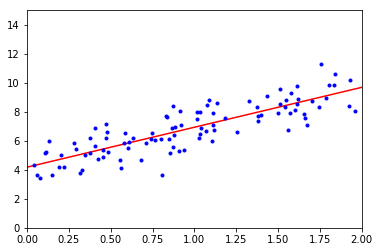

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/Users/remer/Documents/RemeR/workspace/handson-ml/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 4.18057385]), array([[ 2.75478461]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.18057385],
       [ 9.69014308]])

In [8]:
# Batch Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for it in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[ 4.18057385],
       [ 2.75478461]])

In [9]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for it in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(it)
        theta = theta - eta * gradients
        
theta

array([[ 4.09492994],
       [ 2.62974611]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.16144823]), array([ 2.72043719]))

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.92602441]), array([[ 0.87695939,  0.49965596]]))

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
        

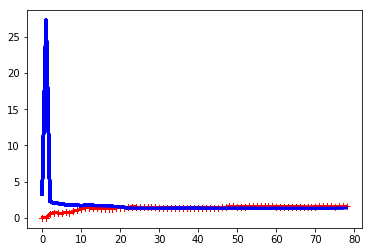

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

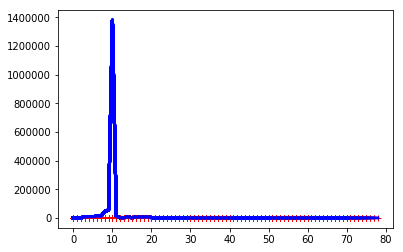

In [16]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("polynomial_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([1.5])

/Users/remer/Documents/RemeR/workspace/handson-ml/env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 4.35408907]])

In [24]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([1.5])

/Users/remer/Documents/RemeR/workspace/handson-ml/env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.31565327])

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([1.5])

/Users/remer/Documents/RemeR/workspace/handson-ml/env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 4.28664212])

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([1.5])

/Users/remer/Documents/RemeR/workspace/handson-ml/env/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 4.29513587])

In [34]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split

X_poly_train, X_poly_val = train_test_split(X_poly, test_size=0.3)
y_train, y_val = train_test_split(y.ravel(), test_size=0.3)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_poly_train, y_train)
    y_val_predict = sgd_reg.predict(X_poly_val)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


In [36]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [37]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

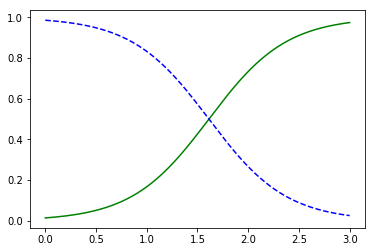

In [39]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [40]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [41]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [42]:
soft_max_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
soft_max_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
soft_max_reg.predict([[5, 2]])

array([2])

In [44]:
soft_max_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])